<a href="https://colab.research.google.com/github/Thanvitha/gis/blob/main/Indiamap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download the geographical data from https://gadm.org/download_country_v3.html

In [1]:
import os, zipfile #basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [2]:
!pip install mapclassify
import mapclassify #need for thematic map classification

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 1.1 MB/s eta 0:00:00


In [32]:
! wget -q -O gadm36_IND_shp.zip https://docs.google.com/uc?id=1D91mK60q74pC2RCStj1GGs34cQODhANh&export=download
zip_ref = zipfile.ZipFile('gadm36_IND_shp.zip', 'r'); zip_ref.extractall(); zip_ref.close()
ind=gpd.read_file('gadm36_IND_shp.zip')

<Axes: >

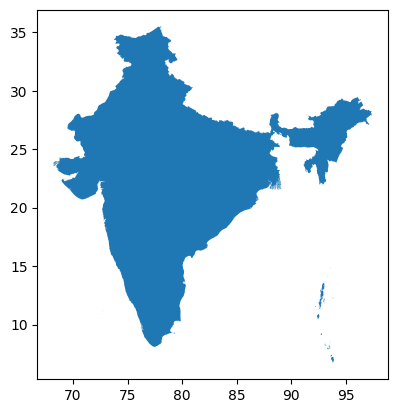

In [33]:
ind.plot()

In [27]:
india = "gadm36_IND.gpkg"

In [28]:
india_map = gpd.read_file(india, layer =1)

In [ ]:
india_map.head()

In [30]:
india_map.NAME_1

0      Andaman and Nicobar
1      Andaman and Nicobar
2      Andaman and Nicobar
3           Andhra Pradesh
4           Andhra Pradesh
              ...         
661            West Bengal
662            West Bengal
663            West Bengal
664            West Bengal
665            West Bengal
Name: NAME_1, Length: 666, dtype: object

<Axes: >

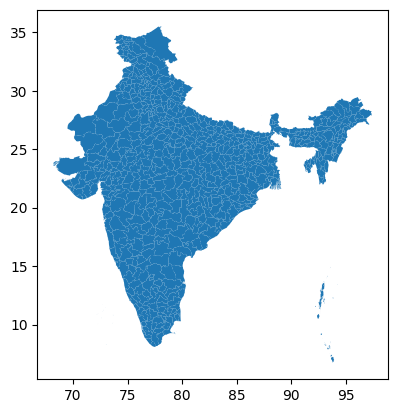

In [31]:
india_map.plot()

In [ ]:
india_map = india_map.rename(columns={"NAME_1":"id"})
india_map.head()

In [ ]:
india_map = india_map.loc[:,["id","geometry"]]
india_map.head()

Import population data from wikipedia

In [39]:
india_info = pd.read_html("https://en.wikipedia.org/wiki/List_of_metropolitan_areas_in_India")

In [40]:
india_info

[                Metropolitan area                           State/Territory  \
                 Metropolitan area                           State/Territory   
 0         National Capital Region  Delhi, Haryana, Uttar Pradesh, Rajasthan   
 1                          Mumbai                               Maharashtra   
 2                         Chennai                                Tamil Nadu   
 3                         Kolkata                               West Bengal   
 4                       Bangalore                                 Karnataka   
 5                       Hyderabad                                 Telangana   
 6                            Pune                               Maharashtra   
 7                       Ahmedabad                                   Gujarat   
 8                           Surat                                   Gujarat   
 9                   Visakhapatnam                            Andhra Pradesh   
 10  Andhra Pradesh Capital Region      

In [41]:
india_population = india_info[0]
india_population

Metropolitan area                           State/Territory  \
                Metropolitan area                           State/Territory   
0         National Capital Region  Delhi, Haryana, Uttar Pradesh, Rajasthan   
1                          Mumbai                               Maharashtra   
2                         Chennai                                Tamil Nadu   
3                         Kolkata                               West Bengal   
4                       Bangalore                                 Karnataka   
5                       Hyderabad                                 Telangana   
6                            Pune                               Maharashtra   
7                       Ahmedabad                                   Gujarat   
8                           Surat                                   Gujarat   
9                   Visakhapatnam                            Andhra Pradesh   
10  Andhra Pradesh Capital Region                            Andhra Pradesh   
11                         Jaipur                                 Rajasthan   
12                      Kozhikode                                    Kerala   
13                          Kochi                                    Kerala   
14                         Kanpur                             Uttar Pradesh   
15                         Nagpur                               Maharashtra   
16                     Coimbatore                                Tamil Nadu   
17             Thiruvananthapuram                                    Kerala   
18                          Salem                                Tamil Nadu   
19                         Nashik                               Maharashtra   
20                        Madurai                                Tamil Nadu   
21                     Malappuram                                    Kerala   
22                         Raipur                              Chhattisgarh   
23                        Jodhpur                                 Rajasthan   

   Skyline     Population                          Area               
   Skyline          Count             As of         km2        sq mi  
0      NaN       46069000           2011[3]       55083    21,268[4]  
1      NaN       23598000           2011[5]        6328     2,443[6]  
2      NaN       15900000              2018        5904         2280  
3      NaN       15134000           2022[7]        1887       729[8]  
4      NaN       13193000           2022[9]        8005    3,091[10]  
5      NaN       10534000          2022[11]        7257    2,802[12]  
6      NaN       10089916          2022[13]        7256    2,802[13]  
7      NaN        8450000          2022[14]        1866      720[14]  
8      NaN        7784000          2022[15]        3261         1259  
9      NaN        6000000      2022[16][17]        7329    2,830[18]  
10     NaN        5873588          2011[19]     8352.69      3224.99  
11     NaN        4107000              2022        4873    1,881[20]  
12     NaN        3921000              2022         944      364[21]  
13     NaN        3301000              2022         440      170[22]  
14     NaN        3190000          2022[23]         403          156  
15     NaN        2991000              2022        3567    1,377[24]  
16     NaN        2935000              2022         888          343  
17     NaN        2793000              2022         310      120[25]  
18     NaN        2463367      2022[26][27]    1265.197  488.495[28]  
19     NaN  2,180,000[29]          2022[29]  259.13[30]   100.05[30]  
20     NaN        1799000           2022[8]         247           95  
21     NaN        1729522           2022[8]         858          331  
22     NaN        1760000          2022[31]        1000          390  
23     NaN        2300000  2022[32][33][34]        1005          388

In [43]:
type(india_population)

pandas.core.frame.DataFrame

In [46]:
indiapop = india_population.iloc[:,[0,3]]
indiapop.head()

,Metropolitan area,Population
,Metropolitan area,Count
0,National Capital Region,46069000
1,Mumbai,23598000
2,Chennai,15900000
3,Kolkata,15134000
4,Bangalore,13193000


In [47]:
indiapop = indiapop.rename(columns={"Metropolitan area":"id","Population Count":"population"})
indiapop.head()

,id,Population
,id,Count
0,National Capital Region,46069000
1,Mumbai,23598000
2,Chennai,15900000
3,Kolkata,15134000
4,Bangalore,13193000


<Axes: >

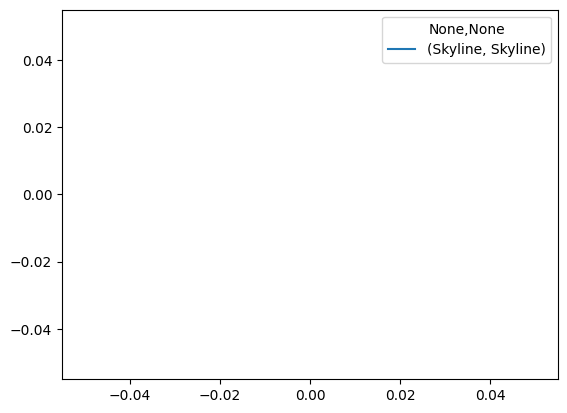

In [50]:
india_population.plot()